In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['aerial-cactus-identification', 'resnett']


In [2]:


from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers



Using TensorFlow backend.


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(rate = 0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

opt = optimizers.Adam(lr = 0.001)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
b = 32 #batch size
train_y = pd.read_csv('../input/aerial-cactus-identification/train.csv', dtype = 'str')
train_x = ImageDataGenerator(rescale = 1./255., validation_split = 0.15)
train_generator = train_x.flow_from_dataframe(dataframe = train_y, directory = '../input/aerial-cactus-identification/train/train', x_col = "id", y_col = "has_cactus" ,subset = "training", target_size = (150, 150), batch_size = b, class_mode = 'binary', shuffle = True, color_mode = 'rgb')
valid_generator = train_x.flow_from_dataframe(dataframe = train_y, directory = '../input/aerial-cactus-identification/train/train', x_col = "id", y_col = "has_cactus", subset = "validation", target_size = (150, 150), batch_size = b, class_mode = 'binary', shuffle = True, color_mode = 'rgb')

Found 14875 images belonging to 2 classes.
Found 2625 images belonging to 2 classes.


In [5]:
test_x = ImageDataGenerator(rescale = 1./255.)
test_y = pd.read_csv('../input/aerial-cactus-identification/sample_submission.csv', dtype = 'str')
test_generator = test_x.flow_from_dataframe(dataframe = test_y, directory = '../input/aerial-cactus-identification/test/test', x_col = "id", y_col = None, target_size = (150, 150), batch_size = b, class_mode = None, shuffle = False, color_mode = 'rgb')

Found 4000 images.


In [6]:
steps_train = train_generator.n//train_generator.batch_size
steps_valid = valid_generator.n//valid_generator.batch_size
steps_test = test_generator.n//test_generator.batch_size

h = model.fit_generator(generator = train_generator, steps_per_epoch = steps_train, validation_data = valid_generator, validation_steps = steps_valid, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
  2/464 [..............................] - ETA: 12:27 - loss: 0.6613 - acc: 0.4844

KeyboardInterrupt: 

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import json
from tqdm import tqdm,tqdm_notebook
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

['aerial-cactus-identification', 'resnett']


(17500, 2)
(32, 32, 3)


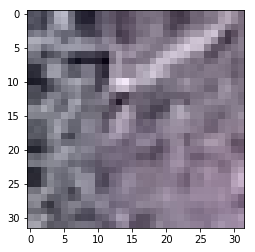

In [8]:
train_df=pd.read_csv("../input/aerial-cactus-identification/train.csv")
train_df["has_cactus"]=train_df["has_cactus"].map(lambda x:str(x))
print(train_df.shape)

import cv2
image=cv2.imread("../input/aerial-cactus-identification/train/train/01e30c0ba6e91343a12d2126fcafc0dd.jpg"
                )
plt.imshow(image)
print(image.shape)

**Train With ResNET-50**

In [17]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,MaxPooling2D
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.models import Model
from keras import regularizers

In [18]:
base_model=ResNet50(weights="../input/resnett/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5",include_top=False,input_shape=(32,32,3))

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [19]:
def add_new_layer(base_model):
    x=base_model.output
    x=Flatten()(x)
    x=Dense(512,activation="relu")(x)
    predictions = Dense(1, activation='sigmoid',activity_regularizer=regularizers.l1(0.05))(x)
    model = Model(input=base_model.input, output=predictions)
    return model
def transfer_learn(model, base_model):
    for layer in base_model.layers:
        layer.trainable = True
    model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy',
                  metrics=['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=0.1,
                                 rotation_range=30,
                                 shear_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 zoom_range=0.2)
train_generator=train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="../input/aerial-cactus-identification/train/train",
    x_col="id",
    y_col="has_cactus",
    batch_size=32,
    shuffle=True,
    class_mode="binary",
    target_size=(32,32),
    subset='training')

validation_generator=train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="../input/aerial-cactus-identification/train/train",
    x_col="id",
    y_col="has_cactus",
    batch_size=32,
    shuffle=True,
    class_mode="binary",
    target_size=(32,32),
    subset='validation')

Found 15750 images belonging to 2 classes.
Found 1750 images belonging to 2 classes.


In [21]:
model=add_new_layer(base_model)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [22]:
transfer_learn(model, base_model)

In [26]:
history=model.fit_generator(generator=train_generator,
                            validation_data=validation_generator,
                            validation_steps= 64,
                            steps_per_epoch= 200,
                            epochs=10,
                            verbose=2)

Epoch 1/10


KeyboardInterrupt: 

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['acc', 'val_acc']].plot()